# Time Series Data Exploration & Visualization Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Read the sales.csv data set into a Pandas dataframe.

In [2]:
sales = pd.read_csv('https://tf-assets-prod.s3.amazonaws.com/tf-curric/data-science/Data%20Sets%20Time%20Series%20Analysis/Time%20Series%20-%20Day%202/sales.csv', sep=';')
print(sales.shape)
sales.head()

(6758125, 9)


,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber
0,1,6,27039,381,7,NaN,"0,00",2018-02-05 07:38:25.430,FQL4S94E4ME1EZFTG42G
1,2,16,25011,61,7,NaN,"0,00",2018-02-02 16:03:31.150,12UGLX40DJ1A5DTFBHB8
2,3,13,94024,23,24,NaN,"0,00",2018-05-03 19:31:56.880,5DT8RCPL87KI5EORO7B0
3,4,8,73966,176,19,0.2,"0,00",2018-04-07 14:43:55.420,R3DR9MLD5NR76VO17ULE
4,5,10,32653,310,9,NaN,"0,00",2018-02-12 15:37:03.940,4BGS0Z5OMAZ8NDAFHHP3


### Convert the SalesDate field to a datetime data type.

In [3]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype  
---  ------             -----  
 0   SalesID            int64  
 1   SalesPersonID      int64  
 2   CustomerID         int64  
 3   ProductID          int64  
 4   Quantity           int64  
 5   Discount           float64
 6   TotalPrice         object 
 7   SalesDate          object 
 8   TransactionNumber  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 464.0+ MB


In [4]:
sales['SalesDate'] = pd.to_datetime(sales['SalesDate'])
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6758125 entries, 0 to 6758124
Data columns (total 9 columns):
 #   Column             Dtype         
---  ------             -----         
 0   SalesID            int64         
 1   SalesPersonID      int64         
 2   CustomerID         int64         
 3   ProductID          int64         
 4   Quantity           int64         
 5   Discount           float64       
 6   TotalPrice         object        
 7   SalesDate          datetime64[ns]
 8   TransactionNumber  object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(2)
memory usage: 464.0+ MB


### Create a line chart showing the number of total units sold per day in February.

In [5]:
#extracting date info
sales['Day'] = sales['SalesDate'].dt.day
sales['Month'] = sales['SalesDate'].dt.strftime('%B')
sales['Weekday'] = sales['SalesDate'].dt.weekday
sales['Hour'] = sales['SalesDate'].dt.hour

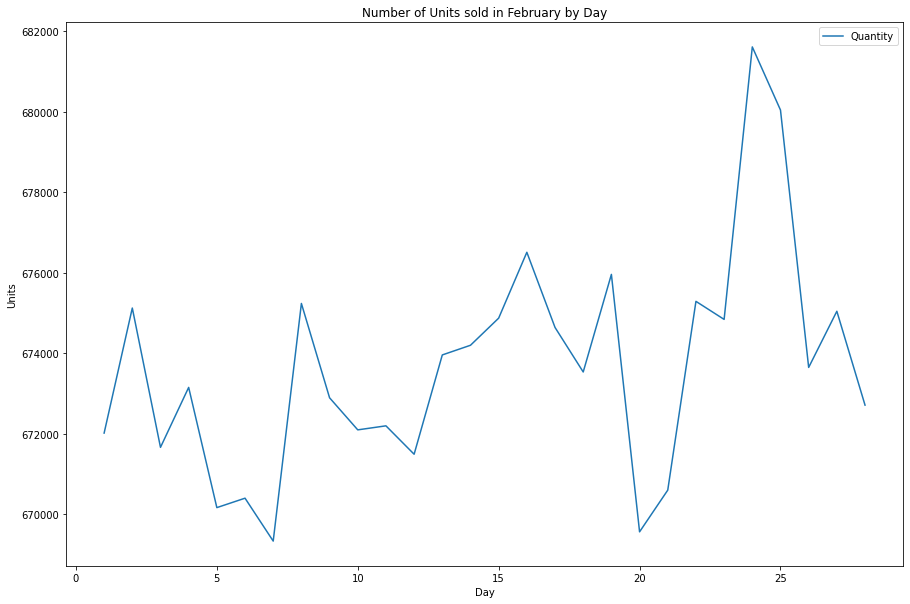

In [11]:
feb_df = sales[sales['Month'] == 'February']
feb_df.groupby('Day').agg({'Quantity':'sum'}).plot(kind='line', figsize=(15,10))
plt.ylabel('Units')
plt.title('Number of Units sold in February by Day')
plt.show()

### Create a multi-line chart comparing the daily units sold in March for the following product IDs: 124, 344, 407, and 449.

In [9]:
#124, 344, 407, 449
id_sales = sales.loc[lambda x: x.ProductID.isin([124, 344, 407, 449])]
march_id_sales = id_sales.loc[lambda x: x.Month == 'March']
march_id_sales.head()

,SalesID,SalesPersonID,CustomerID,ProductID,Quantity,Discount,TotalPrice,SalesDate,TransactionNumber,Day,Month,Weekday,Hour
31,32,22,47694,124,13,0.2,"0,00",2018-03-04 07:09:32.220,ZOAVW4V6EBSQ71HAT5KZ,4.0,March,6.0,7.0
98,99,17,92090,124,24,0.2,"0,00",2018-03-24 15:29:24.980,I78H3546AWIT4D2QS9FG,24.0,March,5.0,15.0
232,233,19,62970,407,16,NaN,"0,00",2018-03-01 05:43:52.130,WBUXH9VP5ID73G3LUS5G,1.0,March,3.0,5.0
696,697,11,96920,124,25,NaN,"0,00",2018-03-09 23:59:54.780,II54BNTNEAQ1FQ5OO9SG,9.0,March,4.0,23.0
1677,1678,7,16978,449,5,NaN,"0,00",2018-03-09 10:01:48.050,QS1H99B00E8QD5CQL4KZ,9.0,March,4.0,10.0


In [14]:
#pivot table
df_march = march_id_sales.pivot_table(index='Day', columns='ProductID', values='Quantity', aggfunc='sum')

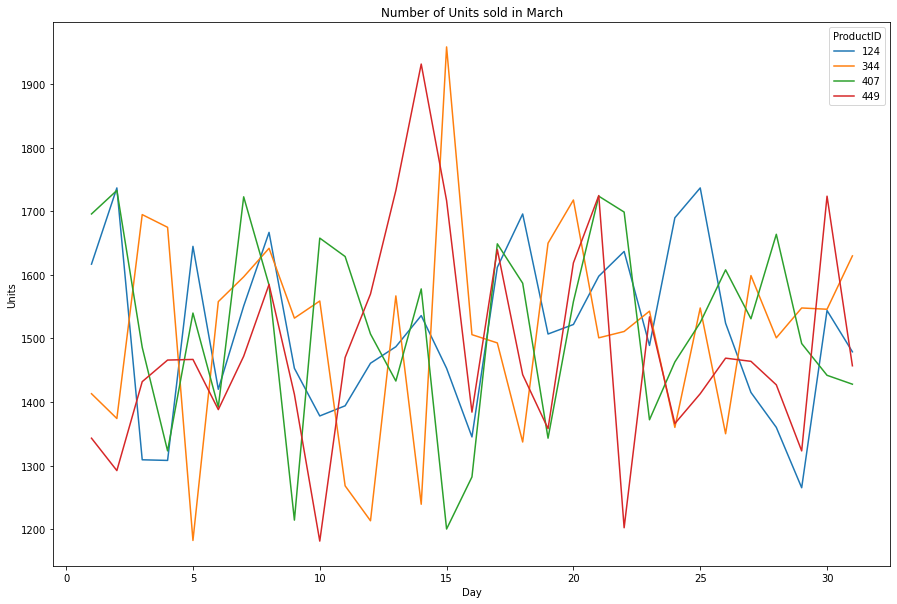

In [15]:
#line chart for filtered productIDs in march
df_march.plot(kind='line', figsize=(15,10))
plt.ylabel('Units')
plt.title('Number of Units sold in March')
plt.show()

### Create a bar chart that shows units sold by each hour of the day.

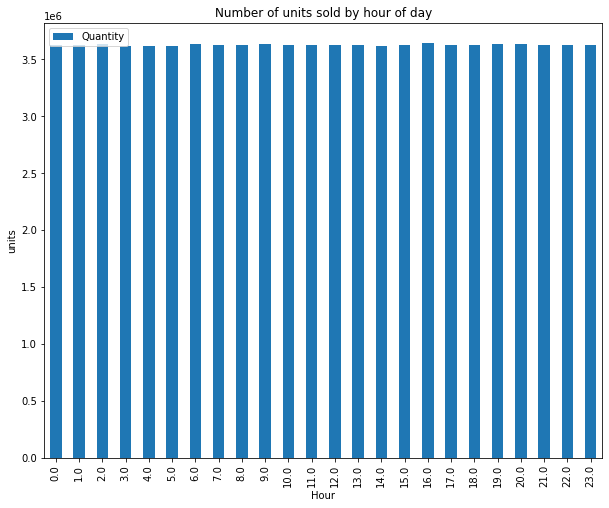

In [16]:
sales.groupby('Hour').agg({'Quantity': 'sum'}).plot(kind='bar', figsize=(10,8))
plt.ylabel('units')
plt.title('Number of units sold by hour of day')
plt.show()

### Create a heatmap that shows total unit sales by hour of the day and day of the week.

In [26]:
#pivot table
heatmap_sales = sales.pivot_table(index='Hour', columns='Weekday', values='Quantity', aggfunc='count')

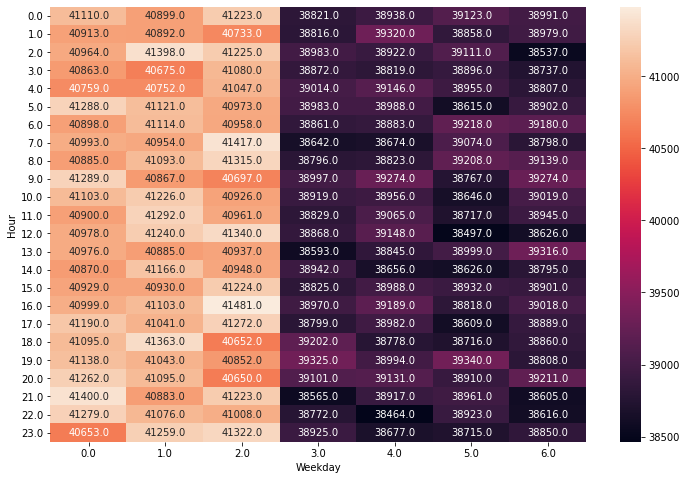

In [28]:
plt.figure(figsize=(12,8))
sns.heatmap(heatmap_sales, annot=True, fmt='.1f')
plt.show()

### Choose 20 ProductIDs at random and create a correlation plot showing the correlation of daily units sold for them 

In [34]:
sales['Date'] = sales['SalesDate'].dt.date

In [36]:
def correlation_plot(df, title=''):
  corr = df.corr()
  mask = np.zeros_like(corr, dtype=np.bool)
  mask[np.triu_indices_from(mask)] = True

  plt.subplots(figsize=(15,10))
  cmap = sns.diverging_palette(6, 255, as_cmap=True)
  sns.heatmap(corr, mask=mask, cmap=cmap, center=0, linewidths=.5, annot=True)
  plt.title(title + '\n', fontsize=20)

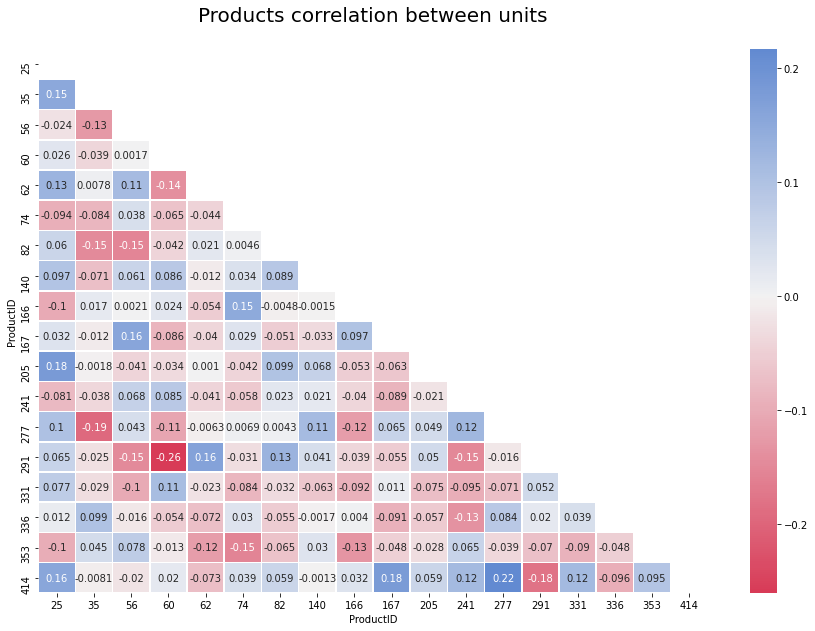

In [37]:
id_samples = list(sales['ProductID'].sample(20))
sales_id_sample = sales.loc[lambda x: x.ProductID.isin(id_samples)]
corr_sales = sales_id_sample.pivot_table(index='Date', columns='ProductID', values='Quantity', aggfunc='count')

#plot
correlation_plot(corr_sales, title='Products correlation between units')

### Create a histogram showing the distribution of daily units sold.

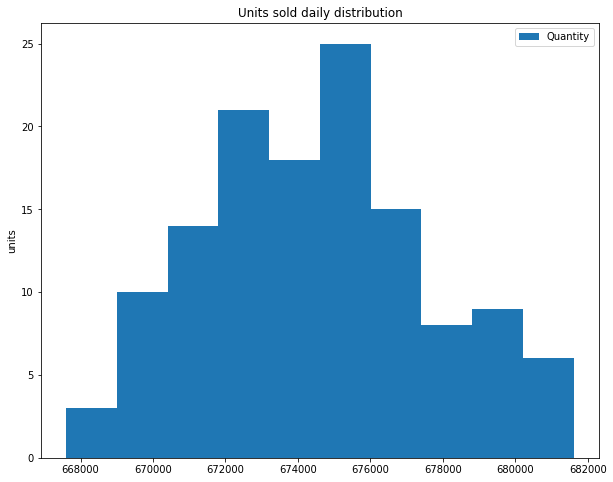

In [38]:
sales.groupby('Date').agg({'Quantity':'sum'}).plot(kind='hist', figsize=(10,8))
plt.ylabel('units')
plt.title('Units sold daily distribution')
plt.show()


### Create a violin plot showing the distribution of daily units sold by month.

In [48]:
month_sales = sales.pivot_table(index='Date', columns='Month', values='Quantity', aggfunc='sum')

In [50]:
month_sales

Month,April,February,January,March,May
Date,,,,,
2018-01-01,NaN,NaN,674961.0,NaN,NaN
2018-01-02,NaN,NaN,675319.0,NaN,NaN
2018-01-03,NaN,NaN,670676.0,NaN,NaN
2018-01-04,NaN,NaN,669381.0,NaN,NaN
2018-01-05,NaN,NaN,678827.0,NaN,NaN
...,...,...,...,...,...
2018-05-05,NaN,NaN,NaN,NaN,673794.0
2018-05-06,NaN,NaN,NaN,NaN,672185.0
2018-05-07,NaN,NaN,NaN,NaN,676569.0


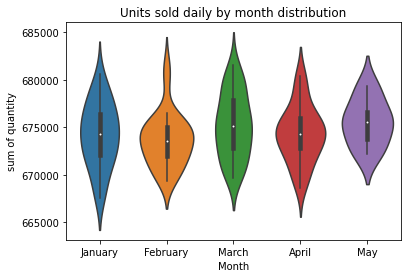

In [53]:
sns.violinplot(data=month_sales, order=['January', 'February', 'March', 'April', 'May'])
plt.ylabel('sum of quantity')
plt.title('Units sold daily by month distribution')
plt.show()